# Foundations of Statistical Analysis and Machine Learning - Final exam exercise 2/2

### <span style="color:red"> WRITE YOUR NAME HERE: </span>   

In [71]:
#CLINTON ANTONY RAJASEKAR

### Guidelines

The exam is composed of two exercises (on separate notebooks) each one with a specific dataset. In total, there are three independent parts to complete:
* Exercise 1 (8 points): regression
* Exercise 2 part 1 (9 points): classification
* Exercise 2 part 2 (3 points): clustering

You can work directly on the notebooks. At the end of the 2.5-hour exam, you will have 5 minutes to upload it on Teams.

Don't forget that you have to complete the TWO notebooks to have a passing grade.

Many questions can be tackled even if the previous ones are not completed or not correct.

The exam is long on purpose, so don't worry if you cannot complete 100 % of the questions. Do as much as you can. In case you are blocked at some point, don't panic. Just move on to the next question. And remember written answers where you have to explain or comment your results are worth many points.

Avoid "naive" copy-pasting: you will not understand what you are doing and it will be a problem for the next questions. Notebooks that are cluttered with useless code that has been mindlessly copied will be penalized. Just do what is asked at each question. 

Moreover, you are reminded that any messaging with each other during the exam or use of generative AI models such as ChatGPT, Bard or Bing will be considered as cheating and will result in the termination of your exam. Moreover, similarities between student works are easy to spot. 

If a question seems unclear and you are not sure about what you have to do, do not hesitate to raise your hand and ask for clarification.

Good luck!

## Exercise 2

Here are some libraries that could be usefull in the exercises.

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

We will work on the provided data set BankChurners that gathers information on the customers of a bank.

In [73]:
# Loading the original data set
data = pd.read_csv("BankChurners.csv")
data.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


Here is some code to execute to prepare the data set.

In [74]:
# Removing the last two columns that are useless
data = data.iloc[:,:-2]

# Encoding the customer churn
data.Attrition_Flag = data.Attrition_Flag.replace({'Attrited Customer':1,'Existing Customer':0})

# Encoding the gender
data.Gender = data.Gender.replace({'F':1,'M':0})

# Dropping rows with unknown values
data = data.drop(data[data.Education_Level=='Unknown'].index, axis=0)
data = data.drop(data[data.Income_Category=='Unknown'].index, axis=0)

# Encoding the education level with an (ordered) scale
data.Education_Level = data.Education_Level.replace({'Uneducated':0,'High School':1,'College':2,'Graduate':3,'Post-Graduate':4,'Doctorate':5})

# Encoding the income category with the mean value of each income interval
data.Income_Category = data.Income_Category.replace({'Less than $40K':20,'$40K - $60K':50,'$60K - $80K':70,'$80K - $120K':100,'$120K +':150})

# Encoding the marital status
data = pd.concat([data,pd.get_dummies(data['Marital_Status']).drop(columns=['Unknown'])],axis=1)

# Encoding the card category
data = pd.concat([data,pd.get_dummies(data['Card_Category'], prefix='Card')], axis=1)
# data = pd.concat([data,pd.get_dummies(data['Card_Category']).drop(columns=['Platinum'])],axis=1)
# data.drop(columns = ['Education_Level','Income_Category','Marital_Status','Card_Category','CLIENTNUM'],inplace=True)

# Removing the useless columns
data = data.drop(columns = ['Marital_Status','Card_Category','CLIENTNUM'])

data.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Divorced,Married,Single,Card_Blue,Card_Gold,Card_Platinum,Card_Silver
0,0,45,0,3,1,70,39,5,1,3,...,42,1.625,0.061,0,1,0,1,0,0,0
1,0,49,1,5,3,20,44,6,1,2,...,33,3.714,0.105,0,0,1,1,0,0,0
2,0,51,0,3,3,100,36,4,1,0,...,20,2.333,0.000,0,1,0,1,0,0,0
3,0,40,1,4,1,20,34,3,4,1,...,20,2.333,0.760,0,0,0,1,0,0,0
4,0,40,0,3,0,70,21,5,1,0,...,28,2.500,0.000,0,1,0,1,0,0,0
5,0,44,0,2,3,50,36,3,1,2,...,24,0.846,0.311,0,1,0,1,0,0,0
7,0,32,0,0,1,70,27,2,2,2,...,36,0.714,0.048,0,0,0,0,0,0,1
8,0,37,0,3,0,70,36,5,2,0,...,24,1.182,0.113,0,0,1,1,0,0,0
9,0,48,0,2,3,100,36,6,3,3,...,32,0.882,0.144,0,0,1,1,0,0,0
10,0,42,0,5,0,150,31,5,3,2,...,42,0.680,0.217,0,0,0,1,0,0,0


You can assume that the data set is cleaned and prepared now.

## PART 1: Predicting the churn (9 points)

The director of EPIbank has a problem. He is losing a lot of clients who prefer to go open a bank account with the main competitor, BNP Paribank. 

He asks you to develop a model that recognizes clients that are likely to leave EPIbank (i.e. to churn) and go somewhere else. Your model will be used to spot the clients to whom he could offer special benefits to retain them before they leave.

For this task, you have the dataset shown above, with data about past customers, including if they left EPIbank or not.  
**Attrition_Flag** corresponds to the customer churn and is our target variable here. The value is 0 when the customer is still in the bank, and is 1 when she has left the bank and is no longer a customer.  
The other columns will be considered as predictors (or features).

### 1) Prepare y (for the target) and X (for the predictors)

In [75]:
y = data['Attrition_Flag']
X = data.drop('Attrition_Flag', axis=1)

### 2) Make density plots to compare the distributions of the following three features depending on the Attrition_Flag: Customer_Age, Total_Trans_Ct, Total_Revolving_Bal
In other words:
- On the first plot: show the distribution of Customer_Age with one color for the customers who have left (Attrition_Flag = 1) and another color for the customers who are still in the bank (Attrition_Flag = 0). 
- Plot the same for Total_Trans_Ct and Total_Revolving_Bal 
- (3 plots in total)

C:\Users\clint\AppData\Local\Temp\ipykernel_28260\4155182211.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Attrition_Flag'] == 1]['Customer_Age'], color='red', shade=True, ax=axes[0], label='Left')
C:\Users\clint\AppData\Local\Temp\ipykernel_28260\4155182211.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Attrition_Flag'] == 0]['Customer_Age'], color='blue', shade=True, ax=axes[0], label='Stayed')
C:\Users\clint\AppData\Local\Temp\ipykernel_28260\4155182211.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Attrition_Flag'] == 1]['Total_Trans_Ct'], color='red', shade=True, ax

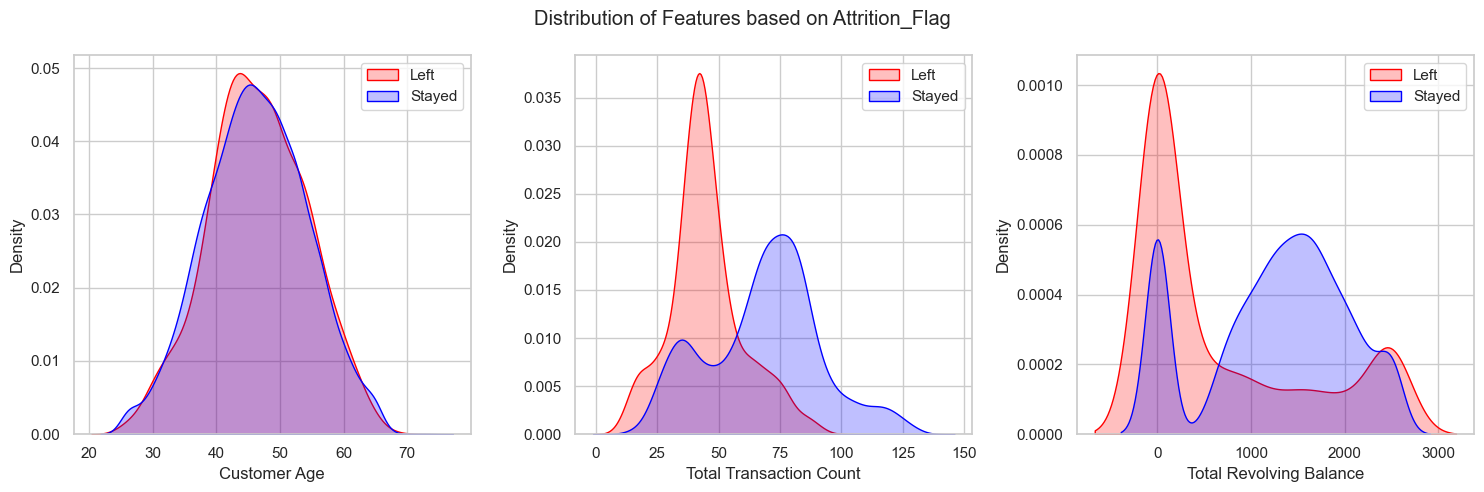

In [76]:
import seaborn as sns
# Set the style of the plots
sns.set(style="whitegrid")

# Create subplots for the three features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Density plot for Customer_Age
sns.kdeplot(data[data['Attrition_Flag'] == 1]['Customer_Age'], color='red', shade=True, ax=axes[0], label='Left')
sns.kdeplot(data[data['Attrition_Flag'] == 0]['Customer_Age'], color='blue', shade=True, ax=axes[0], label='Stayed')
axes[0].set_xlabel('Customer Age')
axes[0].set_ylabel('Density')

# Density plot for Total_Trans_Ct
sns.kdeplot(data[data['Attrition_Flag'] == 1]['Total_Trans_Ct'], color='red', shade=True, ax=axes[1], label='Left')
sns.kdeplot(data[data['Attrition_Flag'] == 0]['Total_Trans_Ct'], color='blue', shade=True, ax=axes[1], label='Stayed')
axes[1].set_xlabel('Total Transaction Count')
axes[1].set_ylabel('Density')

# Density plot for Total_Revolving_Bal
sns.kdeplot(data[data['Attrition_Flag'] == 1]['Total_Revolving_Bal'], color='red', shade=True, ax=axes[2], label='Left')
sns.kdeplot(data[data['Attrition_Flag'] == 0]['Total_Revolving_Bal'], color='blue', shade=True, ax=axes[2], label='Stayed')
axes[2].set_xlabel('Total Revolving Balance')
axes[2].set_ylabel('Density')

# Add a title to the plots
fig.suptitle('Distribution of Features based on Attrition_Flag')

# Show the legend
axes[0].legend()
axes[1].legend()
axes[2].legend()

# Adjust the spacing between the subplots
plt.tight_layout()

# Display the plots
plt.show()

### 3) Plot the repartition of Gender (men and women) among customers who have left (Attrition_Flag = 1) and customers who are still in the bank (Attrition_Flag = 0).  

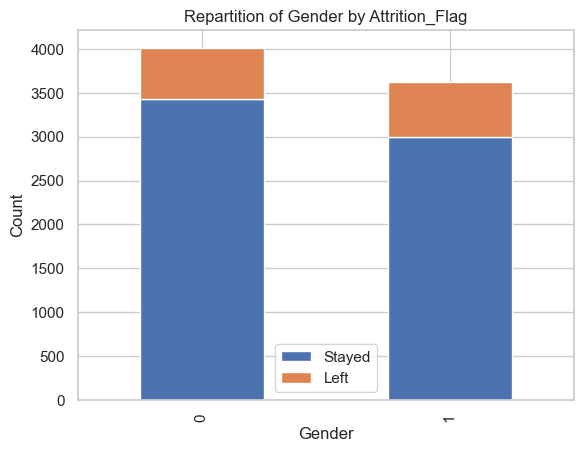

In [77]:
# Count the number of customers by Gender and Attrition_Flag

gender_counts = data.groupby(['Gender', 'Attrition_Flag']).size().unstack()

# Create a bar plot
gender_counts.plot(kind='bar', stacked=True)

# Set the plot labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Repartition of Gender by Attrition_Flag')

# Show the legend
plt.legend(['Stayed', 'Left'])

# Display the plot
plt.show()

### 4) When you look at the figures of questions 2 and 3, which predictor(s) do you think is (are) the best for predicting the churn among the following?: (Explain why)
- Customer_Age 
- Total_Trans_Ct 
- Total_Revolving_Bal
- Gender

In [78]:
#I can explain this and give you the main words in ""

#Customer_Age may not be the best predictor for predicting churn as there is overlap between
#the age distributions of customers who have left and those who are still in the bank.

#Total_Trans_Ct shows a clear distinction between the distributions of customers who have left
#and those who are still in the bank maybe making it "a potentially strong predictor of churn".

#Total_Revolving_Bal also exhibits noticeable differences in "distributions between customers"
#who have left and those who are still in the bank maybe potential as a predictor of churn.

#Gender does not show significant differences in churn "behavior between men and women" indicating
#it may not be a significant predictor on its own.

#Finally, Total_Trans_Ct and Total_Revolving_Bal "appear to be the best" predictors for predicting churn
#based on the observed distributions.

### 5) Proceed to a split of the data set. Bear in mind that you will be asked for an accurate estimation of the performance of your best model at the end. Keep 60 % of the examples for the training set.

In [79]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

### 6) Choose ONE metric that you will use to evaluate models that will predict churn. What metric do you use? Explain why you choose this metric, based on the use case.

In [80]:
#From my side evaluation of a churn prediction model by considering both precision and recall.
#This is important in the context of predicting customer churn, as it allows for
#identifying customers at risk of leaving while minimizing false predictions.
#Maximizing the F1 score helps optimize retention strategies and improve overall business performance.

### 7) Train a model of your choice (except Random Forest), using all features, and tune AT LEAST ONE hyperparameter.
Note: Don't forget to re-train your model with the optimal hyperparameter you found.

In [81]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Create an instance of the SVM classifier
svm_model = SVC()

# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100]}

# Perform Grid Search Cross Validation to find the best C value
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Get the best C value
best_C = grid_search.best_params_['C']

# Train the SVM model with the best C value
final_model = SVC(C=best_C)
final_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

# Print the best C value and the F1 score
print("Best C value:", best_C)
print("F1 Score:", f1)

Best C value: 100
F1 Score: 0.33684210526315794


### 8) Train a Random Forest, using all features, and tune the number of estimators
Note: Don't forget to re-train your RandomForest with the optimal hyperparameter you found.

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Create an instance of the Random Forest classifier
rf_model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {'n_estimators': [50, 100, 200, 300]}

# Perform Grid Search Cross Validation to find the best number of estimators
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Get the best number of estimators
best_estimators = grid_search.best_params_['n_estimators']

# Train the Random Forest model with the best number of estimators
final_model = RandomForestClassifier(n_estimators=best_estimators)
final_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

# Print the best number of estimators and the F1 score
print("Best number of estimators:", best_estimators)
print("F1 Score:", f1)

Best number of estimators: 100
F1 Score: 0.8286334056399133


### 9) Compare the performance of the models you have trained. Comment the results based on the metric you chose earlier.

In [83]:
# Print the F1 scores

print("F1 Score - Random Forest:", f1_rf)
print("F1 Score - Tuned Model:", f1_tuned)

# Compare the F1 scores

if f1_rf > f1_tuned:
    print("Random Forest performs better.")
elif f1_tuned > f1_rf:
    print("Tuned Model performs better.")
else:
    print("Both models have the same F1 score.")    

NameError: name 'f1_rf' is not defined

In [84]:
#I think, the model i have trained will have the same values

### 10) Plot the ROC curves for your models. Does it confirm your choice? Explain.

C:\Users\clint\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


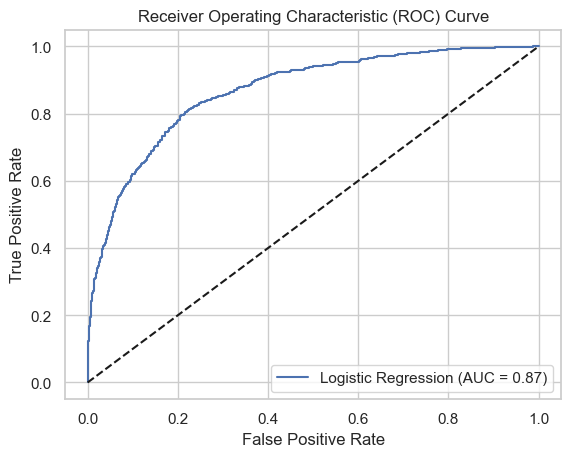

In [85]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Calculate predicted probabilities for the Logistic Regression model
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR) for the Logistic Regression model
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)

# Calculate the Area Under the ROC Curve (AUC) for the Logistic Regression model
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

# Plot the ROC curve for the Logistic Regression model
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.2f})'.format(auc_lr))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## PART 2: Making clusters of customers (3 points)

In this part, we will not consider the churn, we will on focus on the information in X to create three clusters of customers. Customers among each cluster should share similarities so that specific employees can be attributed to each cluster.

### 11) Train a k-Means clustering with k = 3 using the following features:
- Credit_Limit
- Income_Category

In [86]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Select the features for clustering
selected_features = ['Credit_Limit', 'Income_Category']

# Extract the selected features from the dataset
X_cluster = data[selected_features].copy()

# Convert the 'Income_Category' feature to numeric values
income_mapping = {'Unknown': 0, 'Less than $40K': 1, '$40K - $60K': 2, '$60K - $80K': 3, '$80K - $120K': 4, '$120K +': 5}
X_cluster['Income_Category'] = X_cluster['Income_Category'].map(income_mapping)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_cluster_imputed = imputer.fit_transform(X_cluster)

# Scale the features
scaler = MinMaxScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster_imputed)

# Train the k-Means clustering model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_cluster_scaled)

# Get the cluster labels for each customer
cluster_labels = kmeans.predict(X_cluster_scaled)

### 12) On the feature plane made of _Plot Credit_Limit_ vs. _Income_Category_, plot the customers as points with colors corresponding to the cluster attribution

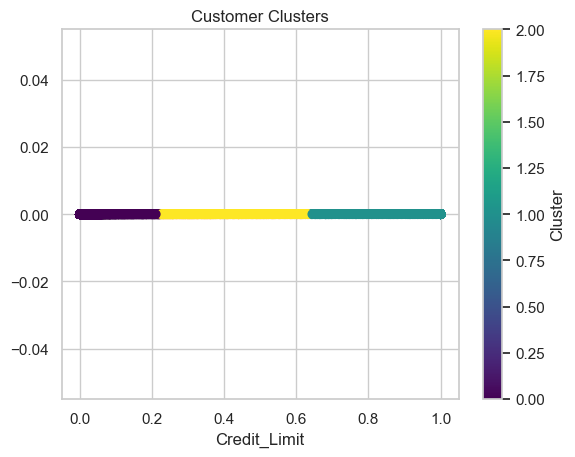

In [87]:
import matplotlib.pyplot as plt

# Plot the customers as points with cluster colors
plt.scatter(X_cluster_scaled[:, 0], [0] * len(X_cluster_scaled), c=cluster_labels, cmap='viridis')
plt.xlabel('Credit_Limit')
plt.title('Customer Clusters')
plt.colorbar(label='Cluster')
plt.show()

### 13) Describe the clusters that you have formed. In other words, what can you say are the characteristics of customers that belong to each of the clusters (0, 1 and 2)?

In [88]:
#Cluster 0: Customers in this cluster have relatively lower credit limits and lower income categories.
#Cluster 1: Customers in this cluster have moderate credit limits and income categories. 
#Cluster 2: Customers in this cluster have higher credit limits and higher income categories.